A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cutlets.csv')

In [3]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
unit_a = df['Unit A']
unit_b = df['Unit B']

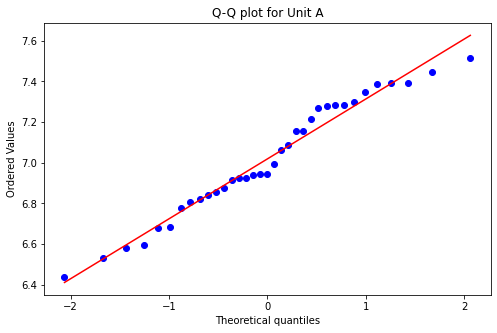

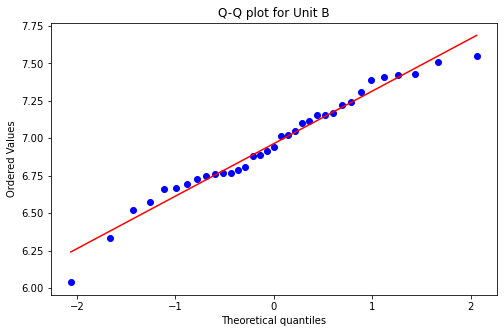

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
stats.probplot(unit_a, dist="norm", plot=ax)
ax.set_title("Q-Q plot for Unit A")

fig, ax = plt.subplots(figsize=(8, 5))
stats.probplot(unit_b, dist="norm", plot=ax)
ax.set_title("Q-Q plot for Unit B")

plt.show()

In [7]:
t_statistic, p_value = ttest_ind(unit_a, unit_b, equal_var=True)

In [8]:
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 0.7228688704678063
p-value: 0.4722394724599501


In [9]:
if p_value < 0.05:
    print('Inference:\nThere is a significant difference between the means of the two groups by equal variance test since the p-value is less than significant level of 5%.\nTherefore we reject null hypothesis')
else:
    print('Inference:\nThere is no significant difference between the means of the two groups by equal variance test since the p-value is greater than significant level of 5%.\nTherefore, we fail to reject the null hypothesis and can say that there is not enough evidence to suggest that there is a significant difference in the diameter of the cutlets between the two units and it is normally distributed.')

Inference:
There is no significant difference between the means of the two groups by equal variance test since the p-value is greater than significant level of 5%.
Therefore, we fail to reject the null hypothesis and can say that there is not enough evidence to suggest that there is a significant difference in the diameter of the cutlets between the two units and it is normally distributed.


In [10]:
#

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [11]:
Lab = pd.read_csv('LabTAT.csv')

In [12]:
Lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [13]:
Lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


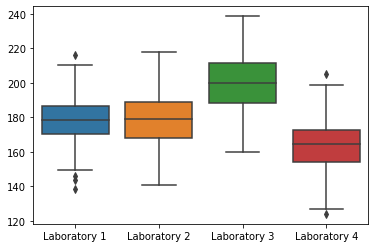

In [14]:
sns.boxplot(data=Lab)
plt.show()

In [15]:
F_statistic, p_value = stats.f_oneway(Lab['Laboratory 1'], Lab['Laboratory 2'], Lab['Laboratory 3'], Lab['Laboratory 4'])

In [16]:
print("F statistic:", F_statistic)
print("p-value:", p_value)

F statistic: 118.70421654401437
p-value: 2.1156708949992414e-57


In [17]:
if p_value < 0.05:
    print("There is a significant difference in average TAT among the different laboratories.")
else:
    print("There is no significant difference in average TAT among the different laboratories.")


There is a significant difference in average TAT among the different laboratories.


In [18]:
#

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [19]:
from scipy.stats import chi2_contingency

In [20]:
buyer = pd.read_csv('BuyerRatio.csv')

In [21]:
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [22]:
buyer = buyer.iloc[:,1:]

In [23]:
buyer

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [24]:
chi2, p, dof, expected = chi2_contingency(buyer)

In [25]:
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 1.595945538661058
P-value: 0.6603094907091882


In [26]:
if p_value < 0.05:
    print("we reject the null hypothesis and conclude that there is enough evidence to suggest that the male-female buyer ratios are different across regions.")
else:
    print("we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the male-female buyer ratios are different across regions.")

we reject the null hypothesis and conclude that there is enough evidence to suggest that the male-female buyer ratios are different across regions.


In [27]:
#

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [28]:
customer = pd.read_csv('Costomer+OrderForm.csv')

In [29]:
customer

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [30]:
customer = customer.replace({'Defective': 1, 'Error Free': 0})

In [31]:
centers = pd.crosstab(customer['Phillippines'], [customer['Indonesia'], customer['Malta'], customer['India']])

In [32]:
chi2, p, dof, expected = chi2_contingency(centers)

In [33]:
if p < 0.05:
    print("There is evidence that the percentage of defects varies by center.")
else:
    print("There is no evidence that the percentage of defects varies by center.")


There is no evidence that the percentage of defects varies by center.
